95.83' Accuracy of the prediction when number of iterations = 500'
95.83' Accuracy of the prediction when number of iterations = 1000'
95.83' Accuracy of the prediction when number of iterations = 2000'
95.83' Accuracy of the prediction when number of iterations = 4000'
95.83' Accuracy of the prediction when number of iterations = 8000'
95.83' Accuracy of the prediction when number of iterations = 16000'
95.83' Accuracy of the prediction when number of iterations = 32000'
95.83' Accuracy of the prediction when number of iterations = 64000'


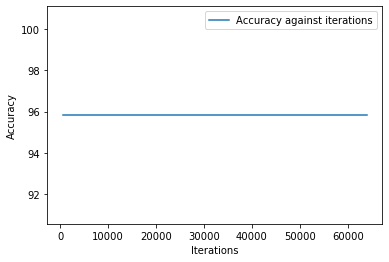

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from DataAnalytics import preprocess
from logistic_regression import logistic_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


def logistic_regression_(x_train, x_test, y_train, y_test):    

    iterations = [500, 1000, 2000, 4000, 8000, 16000, 32000, 64000]
    test_accuracy_iterations = np.empty(len(iterations))

    for j, l in enumerate(iterations):

        logreg = LogisticRegression(C=100, random_state=42, max_iter=l)
        logreg.fit(x_train, y_train)

        y_pred = logreg.predict(x_test)

        correct = (y_test == y_pred).sum()
        incorrect = (y_test != y_pred).sum()
        accuracy = correct / (correct + incorrect) * 100

        test_accuracy_iterations[j] = accuracy
        print("%0.2f' Accuracy of the prediction when number of iterations = %2d'" % (accuracy, l))

    plt.plot(iterations, test_accuracy_iterations, label='Accuracy against iterations')
    plt.legend()
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.show()

def create_data_for_model(dataset):
    x = []
    y = []

    for key in dataset:
        row = []

        #row.append(dataset[key].get('OPEN'))
        row.append(float(dataset[key].get('CLOSE') / dataset[key].get('OPEN')) * 20)

        if (dataset[key].get('PCT_CHANGE') >= 0.0):
            y.append(1)
        else:
            y.append(0)

        x.append(row)

    return x, y

def create_models(data):
    x, y = create_data_for_model(data)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
    logistic_regression_(x_train, x_test, y_train, y_test)


def classification(dataFile):
    dict_data = preprocess(dataFile, False)
    create_models(dict_data)


classification('1150_HISTORY_ADJUSTED_2019.xlsx')
